In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_digits
data_digits = load_digits()


In [2]:
Ind = data_digits.data
tar = data_digits.target


In [3]:
np.unique(tar)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA_transformed = LDA.fit_transform(Ind,tar)


In [5]:
LDA.explained_variance_ratio_

array([0.28912041, 0.18262788, 0.16962345, 0.1167055 , 0.08301253,
       0.06565685, 0.04310127, 0.0293257 , 0.0208264 ])

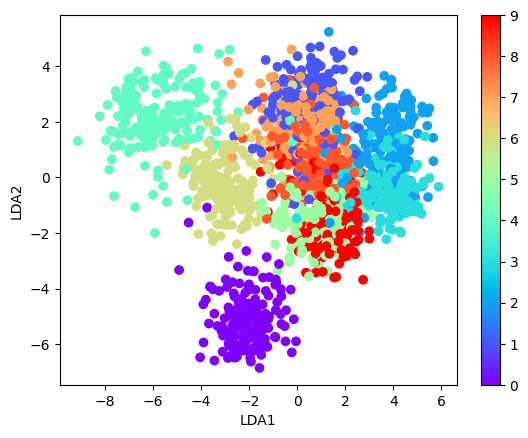

In [6]:
import matplotlib.pyplot as plt

plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.scatter(LDA_transformed[:,0], LDA_transformed[:,1], c=tar, cmap='rainbow')
plt.colorbar()
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(Ind, tar, test_size=0.3, random_state=42)

# Apply LDA
LDA = LinearDiscriminantAnalysis()
X_train_lda = LDA.fit_transform(X_train, y_train)
X_test_lda = LDA.transform(X_test)

# Train classifier
model = LogisticRegression(max_iter=2000)
model.fit(X_train_lda, y_train)

# Predictions
y_pred = model.predict(X_test_lda)

# Accuracy
print("Model accuracy after LDA:", accuracy_score(y_test, y_pred))


Model accuracy after LDA: 0.95


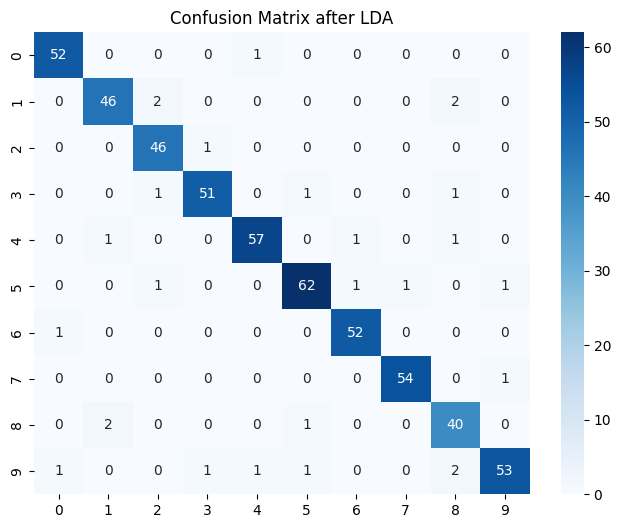

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix after LDA")
plt.show()


## Conclusion 

LDA was applied to the handwritten digits dataset (10 classes).

Original dimensionality: 64 features

LDA reduced it to 9 discriminant components.

LDA components show a clear separation between digits in 2D visualization.

Logistic Regression classifier achieved high accuracy after LDA.

LDA improved model performance and reduced computation time.

LDA is useful when:

Data has multiple classes

Goal is classification

You want dimensionality reduction + better class separation